In [49]:
import shap
import pandas as pd
from catboost import CatBoostRegressor, Pool
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(
    { "figure.figsize": (17, 7) },
    style='ticks',
    palette=sns.color_palette("Set2"),
    color_codes=True,
    font_scale=5
)

plt.rcParams.update({
    "axes.labelsize": 12,  # Axes label font size
})

%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("adverts.csv")
df = df.drop(columns=["reg_code", "standard_make"])
df.dropna(inplace=True)

In [50]:
for col in df:
    if isinstance(col, (str, bool)) and len(df[col].unique()) == 2:
        df[col] = df[col].replace({df[col].unique()[0]:0, df[col].unique()[1]:1})

In [51]:
df = df.convert_dtypes()

In [41]:
X, y = df.drop(columns="price"), df[["price"]]

cat_features = ['standard_colour', 'standard_model', 'vehicle_condition',
                 'body_type', 'crossover_car_and_van', 'fuel_type']

In [42]:
X_pool = Pool(X, cat_features=cat_features)
X_pool

In [43]:
model = CatBoostRegressor()

model.fit(X, y, cat_features=cat_features)
print("Count of trees in model = {}".format(model.tree_count_))

Learning rate set to 0.103938
0:	learn: 22054.5831570	total: 267ms	remaining: 4m 26s
1:	learn: 21345.0537002	total: 539ms	remaining: 4m 28s
2:	learn: 20725.1066396	total: 636ms	remaining: 3m 31s
3:	learn: 20136.6264168	total: 816ms	remaining: 3m 23s
4:	learn: 19612.8837300	total: 1.07s	remaining: 3m 33s
5:	learn: 19196.5916357	total: 1.25s	remaining: 3m 27s
6:	learn: 18798.0329437	total: 1.44s	remaining: 3m 23s
7:	learn: 18425.5099710	total: 1.59s	remaining: 3m 17s
8:	learn: 18194.2852084	total: 1.72s	remaining: 3m 8s
9:	learn: 17947.2610641	total: 1.93s	remaining: 3m 11s
10:	learn: 17748.8262080	total: 2.08s	remaining: 3m 7s
11:	learn: 17547.1156150	total: 2.35s	remaining: 3m 13s
12:	learn: 17389.6278737	total: 2.48s	remaining: 3m 8s
13:	learn: 17252.5669750	total: 2.61s	remaining: 3m 3s
14:	learn: 17151.9293628	total: 2.87s	remaining: 3m 8s
15:	learn: 17058.7577161	total: 3.02s	remaining: 3m 5s
16:	learn: 16882.7784182	total: 3.12s	remaining: 3m
17:	learn: 16779.4355216	total: 3.26s	

In [44]:
importance = model.get_feature_importance(X_pool, type="ShapValues")

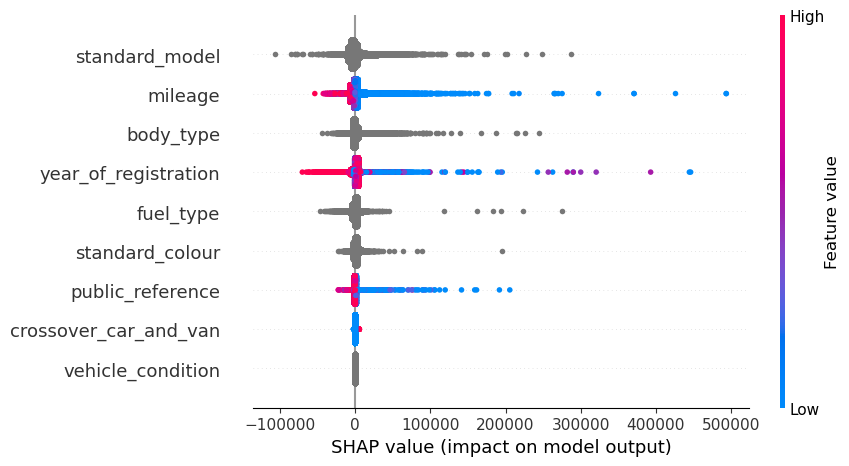

In [47]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

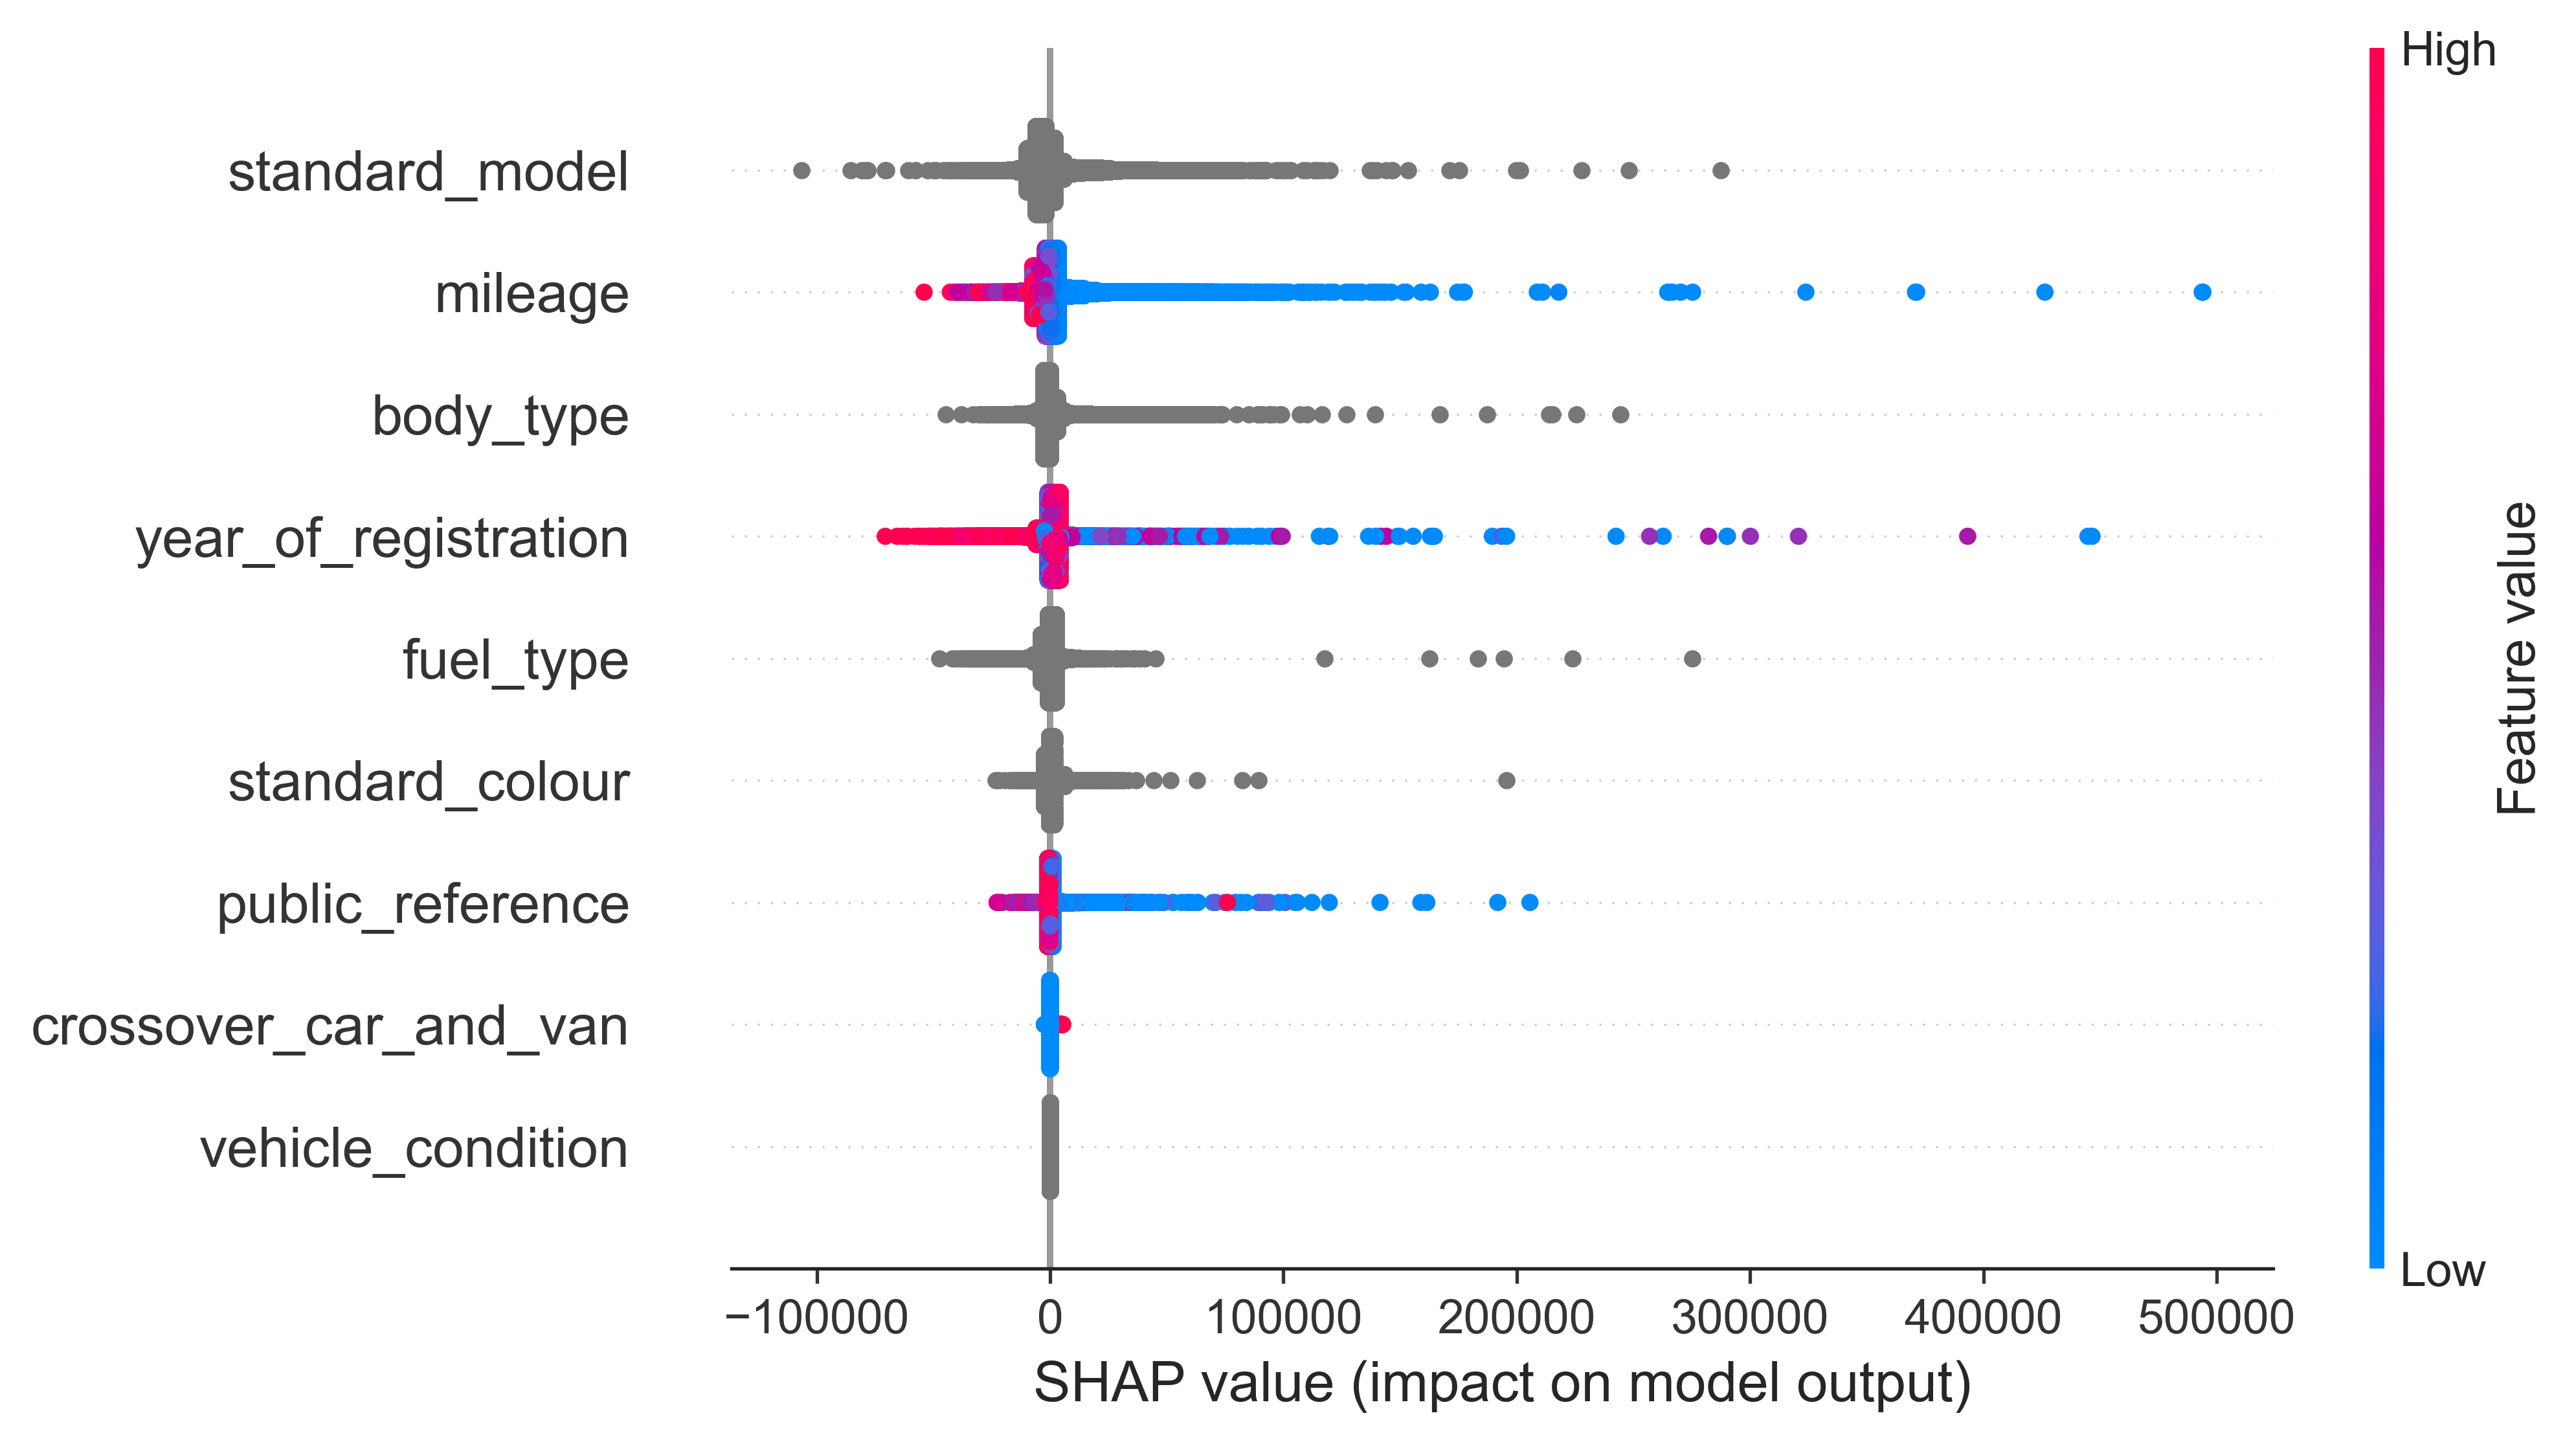

In [52]:
# summarize the effects of all the features
plt.figure(figsize=(12, 5), dpi=240)
shap.plots.beeswarm(shap_values, show=False)
plt.savefig("shap.png", dpi=240)

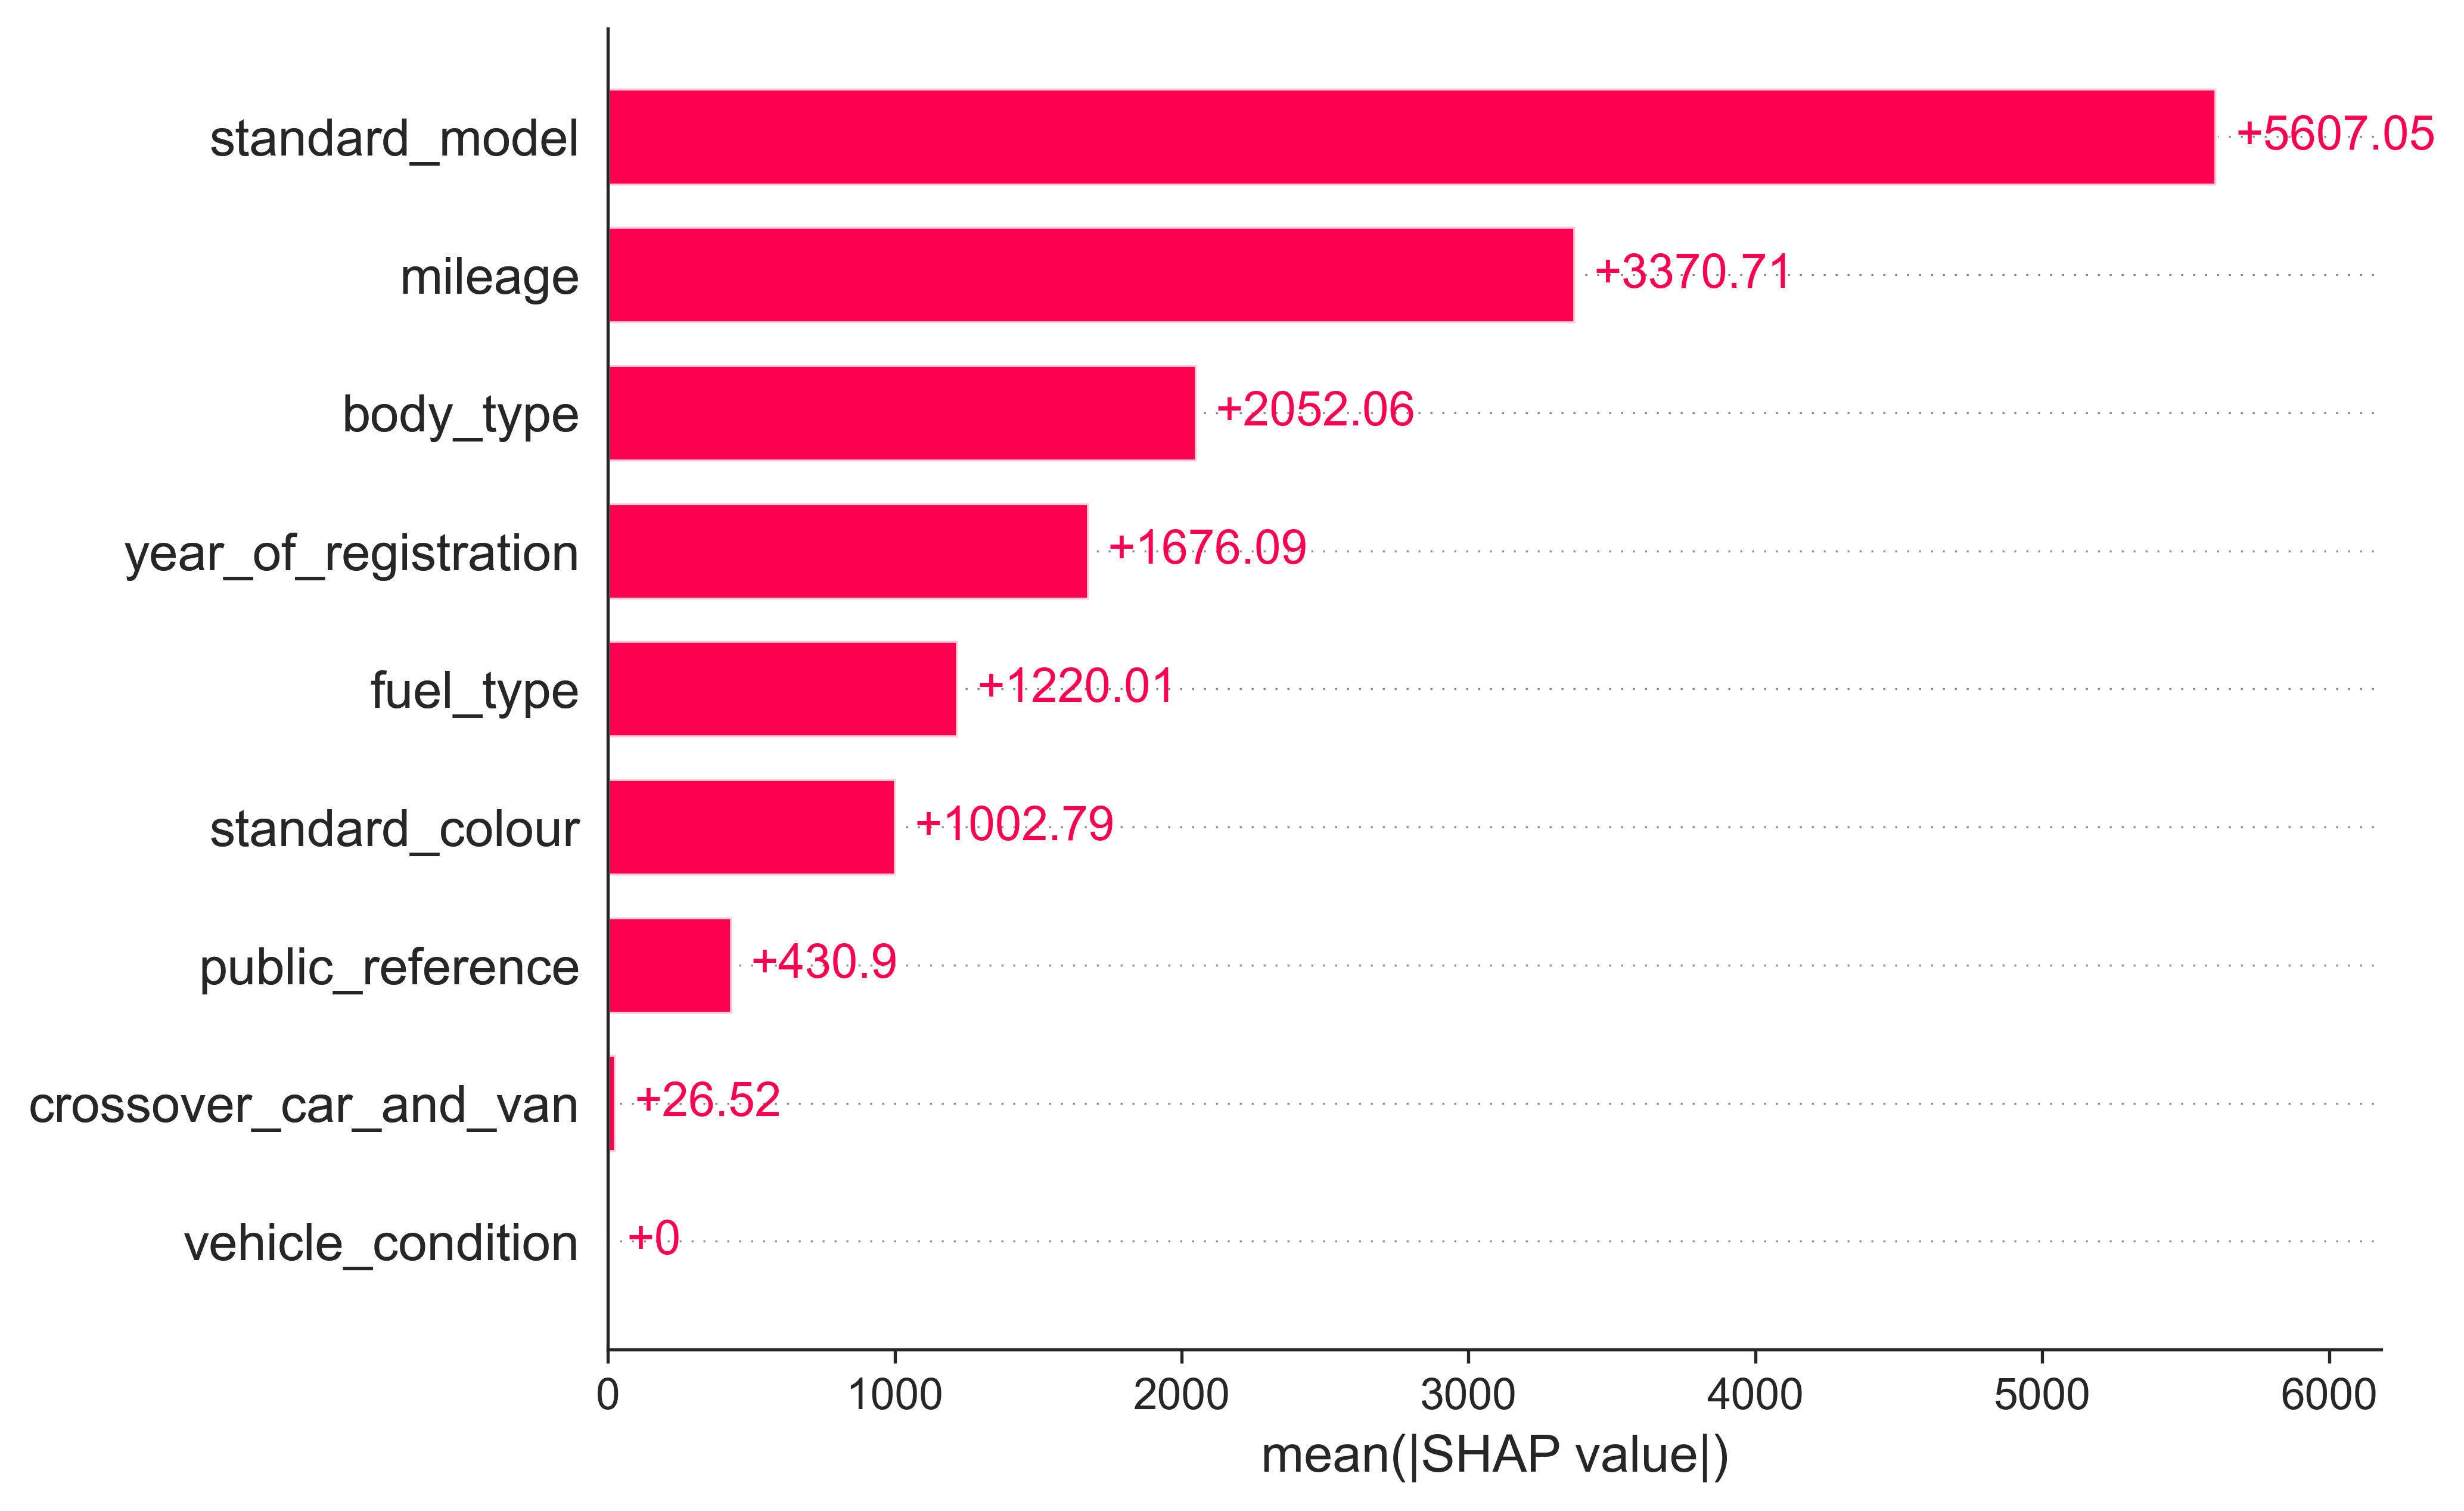

In [54]:
plt.figure(figsize=(12, 2), dpi=240)
shap.plots.bar(shap_values)